In [1]:
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
#image_path = '/sps/lsst/groups/auxtel/data/raw_ncsa/'+obs_date+'/'
image_path = '/sps/lsst/groups/auxtel/data/raw_ncsa/{0}/'
image_label = 'AT_O_{1}_{2}-R00S00.fits'
image_name = os.path.join(image_path+image_label)
print(image_name)

/sps/lsst/groups/auxtel/data/raw_ncsa/{0}/AT_O_{1}_{2}-R00S00.fits


In [3]:
#filters = ['empty','FELH0600','SDSSg']
#filters = ['SDSSg','SDSSr','empty']
#filters = ['FELH0600','SDSSg']
filters = ['FELH0600']
date_dict = {'SDSSg':'2022-03-16','SDSSr':'2022-03-16','empty':'2021-07-08','BG40':'2021-07-08','FELH0600':'2021-10-07'}#,'FELH0600':'2021-11-04'}
#date_dict = {'empty':'2021-03-11','FELH0600':'2021-09-08','SDSSg':'2021-11-04'}
range_dict = {'SDSSg':range(65,95),'SDSSr':range(110,125),'empty':range(62,73),'BG40':range(83,93),'FELH0600':range(63,116)}#,'FELH0600':range(89,116)}
#range_dict = {'empty':range(73,84),'FELH0600':range(62,124),'SDSSg':range(101,116)}

In [4]:
calc_master_bias = False
calc_master_flat = True

In [5]:
import pandas as pd
import sqlite3

In [6]:
def read_sqlite(dbfile):
    import sqlite3
    from pandas import read_sql_query, read_sql_table

    with sqlite3.connect(dbfile) as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
        out = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}

    return out

In [7]:
# data exist here
repoDir='/sps/lsst/groups/auxtel/softs/shared/auxteldm'
registryfile=os.path.join(repoDir,'registry.sqlite3')
dayObs="2021-03-11"
#reporter=NightReporter(repoDir,dayObs)

In [8]:
dict_db = read_sqlite(registryfile)

In [9]:
dict_db.keys()

dict_keys(['raw', 'sqlite_sequence', 'raw_visit'])

In [10]:
#dict_db

In [11]:
dat = sqlite3.connect(registryfile)

In [12]:
query = dat.execute("SELECT * From raw")

In [13]:
query.description

(('id', None, None, None, None, None, None),
 ('dayObs', None, None, None, None, None, None),
 ('seqNum', None, None, None, None, None, None),
 ('visit', None, None, None, None, None, None),
 ('detector', None, None, None, None, None, None),
 ('detectorName', None, None, None, None, None, None),
 ('filter', None, None, None, None, None, None),
 ('dateObs', None, None, None, None, None, None),
 ('date', None, None, None, None, None, None),
 ('expTime', None, None, None, None, None, None),
 ('object', None, None, None, None, None, None),
 ('imageType', None, None, None, None, None, None),
 ('wavelength', None, None, None, None, None, None),
 ('expGroup', None, None, None, None, None, None),
 ('obsid', None, None, None, None, None, None),
 ('expId', None, None, None, None, None, None))

In [14]:
cols = [column[0] for column in query.description]

In [15]:
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [16]:
results

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId
0,1,2021-06-08,1,2031133798900000,0,S00,RG610~holo4_003,2021-06-08T20:23:00.082,2021-06-08T20:23:00.082,0.0,azel_target,BIAS,-666,2021-06-08T20:22:59.890,AT_O_20210608_000001,2021060800001
1,2,2021-06-08,2,2031134348450000,0,S00,RG610~holo4_003,2021-06-08T20:23:55.021,2021-06-08T20:23:55.021,0.0,azel_target,BIAS,-666,2021-06-08T20:23:54.845,AT_O_20210608_000002,2021060800002
2,3,2021-06-08,3,2031134393460000,0,S00,RG610~holo4_003,2021-06-08T20:23:59.516,2021-06-08T20:23:59.516,0.0,azel_target,BIAS,-666,2021-06-08T20:23:59.346,AT_O_20210608_000003,2021060800003
3,4,2021-06-08,4,2031134438450000,0,S00,RG610~holo4_003,2021-06-08T20:24:04.019,2021-06-08T20:24:04.019,0.0,azel_target,BIAS,-666,2021-06-08T20:24:03.845,AT_O_20210608_000004,2021060800004
4,5,2021-06-08,5,2031134483610000,0,S00,RG610~holo4_003,2021-06-08T20:24:08.527,2021-06-08T20:24:08.527,0.0,azel_target,BIAS,-666,2021-06-08T20:24:08.361,AT_O_20210608_000005,2021060800005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13774,13775,2022-03-16,903,2274383426130000,0,S00,SDSSi~empty,2022-03-17T09:20:58.770,2022-03-17T09:20:58.770,30.0,LATISS_E6A_00000024,SKYEXP,-666,2022-03-17T09:19:02.613,AT_O_20220316_000903,2022031600903
13775,13776,2022-03-16,904,2274384188610000,0,S00,SDSSr~empty,2022-03-17T09:21:40.050,2022-03-17T09:21:40.050,30.0,LATISS_E6A_00000024,SKYEXP,-666,2022-03-17T09:20:18.861,AT_O_20220316_000904,2022031600904
13776,13777,2022-03-16,905,2274384188610000,0,S00,SDSSr~empty,2022-03-17T09:22:12.974,2022-03-17T09:22:12.974,30.0,LATISS_E6A_00000024,SKYEXP,-666,2022-03-17T09:20:18.861,AT_O_20220316_000905,2022031600905
13777,13778,2022-03-16,906,2274386419650000,0,S00,SDSSg~empty,2022-03-17T09:24:09.435,2022-03-17T09:24:09.435,30.0,LATISS_E6A_00000044,SKYEXP,-666,2022-03-17T09:24:01.965,AT_O_20220316_000906,2022031600906


In [17]:
results_sorted = results.sort_values(["dayObs", "seqNum"], ascending=True)

In [18]:
results_sorted

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId
8687,8688,2021-02-16,1,1934346219930000,0,S00,empty~empty,2021-02-16T19:50:22.184,2021-02-16T19:50:22.184,0.0,azel_target,BIAS,-666,2021-02-16T19:50:21.993,AT_O_20210216_000001,2021021600001
8688,8689,2021-02-16,2,1934362834080000,0,S00,empty~empty,2021-02-16T20:18:03.588,2021-02-16T20:18:03.588,0.0,azel_target,BIAS,-666,2021-02-16T20:18:03.408,AT_O_20210216_000002,2021021600002
8689,8690,2021-02-16,3,1934362963860000,0,S00,empty~empty,2021-02-16T20:18:16.563,2021-02-16T20:18:16.563,0.0,azel_target,BIAS,-666,2021-02-16T20:18:16.386,AT_O_20210216_000003,2021021600003
8690,8691,2021-02-16,4,1934363094110000,0,S00,empty~empty,2021-02-16T20:18:29.581,2021-02-16T20:18:29.581,0.0,azel_target,BIAS,-666,2021-02-16T20:18:29.411,AT_O_20210216_000004,2021021600004
8691,8692,2021-02-16,5,1934363223760000,0,S00,empty~empty,2021-02-16T20:18:42.546,2021-02-16T20:18:42.546,0.0,azel_target,BIAS,-666,2021-02-16T20:18:42.376,AT_O_20210216_000005,2021021600005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13774,13775,2022-03-16,903,2274383426130000,0,S00,SDSSi~empty,2022-03-17T09:20:58.770,2022-03-17T09:20:58.770,30.0,LATISS_E6A_00000024,SKYEXP,-666,2022-03-17T09:19:02.613,AT_O_20220316_000903,2022031600903
13775,13776,2022-03-16,904,2274384188610000,0,S00,SDSSr~empty,2022-03-17T09:21:40.050,2022-03-17T09:21:40.050,30.0,LATISS_E6A_00000024,SKYEXP,-666,2022-03-17T09:20:18.861,AT_O_20220316_000904,2022031600904
13776,13777,2022-03-16,905,2274384188610000,0,S00,SDSSr~empty,2022-03-17T09:22:12.974,2022-03-17T09:22:12.974,30.0,LATISS_E6A_00000024,SKYEXP,-666,2022-03-17T09:20:18.861,AT_O_20220316_000905,2022031600905
13777,13778,2022-03-16,906,2274386419650000,0,S00,SDSSg~empty,2022-03-17T09:24:09.435,2022-03-17T09:24:09.435,30.0,LATISS_E6A_00000044,SKYEXP,-666,2022-03-17T09:24:01.965,AT_O_20220316_000906,2022031600906


In [19]:
list_of_imgtype = results_sorted['imageType'].unique()
list_of_imgtype 

array(['BIAS', 'FLAT', 'SKYEXP', 'ENGTEST', 'DARK'], dtype=object)

In [20]:
#flat_mask = results_sorted['imageType']=='FLAT'

In [21]:
#time_dict = {}


In [22]:
#np.unique(results_sorted['filter'])

# Fix detector parameters 

In [23]:
num_segments = 16

In [24]:
segment = 4

In [25]:
#filterred = 'SDSSg'
#datered = date_dict[filterred]

In [26]:
#fred = fits.open(image_name.format(datered,datered.replace("-",""),str(65).zfill(6)))

In [27]:
#fred[0].header

# Check that things work for flats 

In [28]:
filter0 = 'SDSSg'
date0 = date_dict[filter0]

/sps/lsst/groups/auxtel/data/raw_ncsa/2022-03-16/AT_O_20220316_000065-R00S00.fits


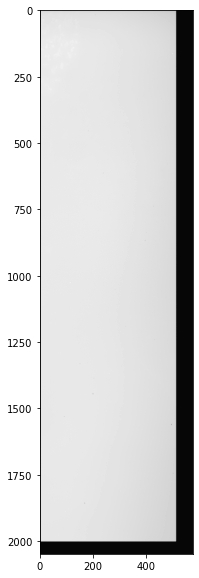

In [29]:
#image_label0 = 'AT_O_{0}'.format(date0.replace("-",""))+'_{1}-R00S00.fits'
#print(image_label0)
print(image_name.format(date0,date0.replace("-",""),str(65).zfill(6)))
f0 = fits.open(image_name.format(date0,date0.replace("-",""),str(65).zfill(6)))
assert (f0[0].header['IMGTYPE']=='FLAT')
data0 = f0[16].data
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

#ax.imshow(data0,origin='lower',cmap="gray",norm=LogNorm())
ax.imshow(data0,cmap="gray",norm=LogNorm())
#ax.imshow(data0,origin='lower',cmap="jet")
plt.show()

In [30]:
print(data0[1500,:][:20])
print(np.mean(data0[1500,:][:20]))
print(data0[2001,:][:20])
print(np.mean(data0[2001,:][:20]))

[ 14961  14050  14828 125938 124850 124816 125772 124333 124513 125236
 125150 124820 125581 124623 124804 124648 125144 125224 125402 126007]
108535.0
[14962 14053 14771 14951 14925 14980 14932 14966 15006 14930 14969 14941
 15000 14944 14982 14941 14968 14973 14953 14968]
14905.75


In [31]:
len(data0.ravel())

1179648

In [32]:
mu = np.average(data0.ravel())
std = np.std(data0.ravel())

In [33]:
#mask = data0.ravel()
#n,bins,_=plt.hist(data0.ravel(),bins=100,range=(10000,20000))
#plt.axvline(x=mu,color='r')
#plt.xlim((14500,15250))

In [34]:
#sum(n)

In [35]:
#std

In [36]:
#select = (data0.ravel()>95000)*(data0.ravel()<15000)

In [37]:
#data0.ravel()[select]

In [38]:
#Mu = np.average(data0.ravel()[select])
#Std = np.std(data0.ravel()[select])
#print(Mu,Std)

In [39]:
#plt.hist(data0.ravel(),bins=100,range=(14900,15000))
#plt.axvline(x=Mu,color='r')

# Check if the median is correctly calculated 

In [40]:
#https://numpy.org/doc/stable/reference/generated/numpy.median.html
#Given a vector V of length N, the median of V is the middle value of a sorted copy of V, V_sorted - i e., V_sorted[(N-1)/2], when N is odd, and the average of the two middle values of V_sorted when N is even.

In [41]:
'''
flat_list = []
for i in range_dict[filter0]:
    print(i)
    image_file = image_name.format(date0,date0.replace("-",""),str(i).zfill(6))
    #print(image_file)
    f = fits.open(image_file)
    print(f[0].header['IMGTYPE'])
    assert (f[0].header['IMGTYPE']=='FLAT')
    data = f[16-segment].data
    print(data.shape)
    flat_list.append(data)
flat_array = np.array(flat_list)
print('----------')
print(flat_array.shape)
'''

'\nflat_list = []\nfor i in range_dict[filter0]:\n    print(i)\n    image_file = image_name.format(date0,date0.replace("-",""),str(i).zfill(6))\n    #print(image_file)\n    f = fits.open(image_file)\n    print(f[0].header[\'IMGTYPE\'])\n    assert (f[0].header[\'IMGTYPE\']==\'FLAT\')\n    data = f[16-segment].data\n    print(data.shape)\n    flat_list.append(data)\nflat_array = np.array(flat_list)\nprint(\'----------\')\nprint(flat_array.shape)\n'

In [42]:
#median_flat = np.median(flat_array,axis=0)
#print(median_flat.shape)

In [43]:
#fig = plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111)

#ax.imshow(median_flat,origin='lower',cmap="gray",norm=LogNorm())
#ax.imshow(median_flat,origin='lower',cmap="jet")
#plt.show()

In [44]:
#(data0==median_flat).all()

# Create master (median) bias from individual biases 

In [45]:
date_bias = '2021-11-04'
range_bias = range(2,51)
#range_bias = range(2,5)

In [46]:
#bias_list = []
if calc_master_bias==True:
    new_hdul = fits.HDUList()
    hdu1 = fits.PrimaryHDU()
    for seg in range(num_segments):
        bias_list = []
        #print(seg)
        hdu2 = fits.ImageHDU()
        for num,i in enumerate(range_bias):
            #print(i)
            #for i in range_bias:
            image_file = image_name.format(date_bias,date_bias.replace("-",""),str(i).zfill(6))
            #print(image_file)
            f = fits.open(image_file)
            assert (f[0].header['IMGTYPE']=='BIAS')
            #print('Exposure time = ', f[0].header['EXPTIME'])
            if num == 0 and seg == 0:
                hdu1.header = f[0].header
                hdu1.header['PIXSTAT'] = 'Median'
                hdu1.header['IMGRANGE'] = (np.min(range_bias),np.max(range_bias))
                hdu1.data = f[0].data
                new_hdul.append(hdu1) 
            #print(seg)
            #print(f[seg].header)
            data = f[num_segments-seg].data
            #print(data.shape)
            bias_list.append(data)
            f.close()
        bias_array = np.array(bias_list)
        print(bias_array.shape)
        median_bias = np.median(bias_array,axis=0)
        print(median_bias.shape)
        hdu2.header = f[num_segments-seg].header
        hdu2.data = median_bias
        new_hdul.append(hdu2)
        print('----------')
    print(len(new_hdul))
    new_hdul.writeto('master_bias_median_{0}_{1}_{2}.fits'.format(date_bias.replace("-",""),np.min(range_bias),np.max(range_bias)), overwrite=True)

In [47]:
master_bias = fits.open('master_bias_median_{0}_{1}_{2}.fits'.format(date_bias.replace("-",""),np.min(range_bias),np.max(range_bias)))

# Loop over filters and over CCD segments to create master (median) flats 

In [24]:
hprescan = 3
hoverscan = 64
voverscan = 48

In [49]:
if calc_master_flat==True:
    median_dict = {}
    for filter in filters:
        print('#######################################'+filter)
        #data_array = np.array([])
        #data_list = []
        for i in range_dict[filter]:
            #print(i)
            image_file = image_name.format(date_dict[filter],date_dict[filter].replace("-",""),str(i).zfill(6))
            f = fits.open(image_file)
            shape0 = f[1].data.shape
        
            for seg in range(1,9):
                #print(seg,f[seg].header['EXTNAME'])
                data_ = f[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]-master_bias[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
                data_ = np.flip(data_,axis=1)
                if seg==1:
                    data0 = data_
                else:
                    data0 = np.concatenate((data0,data_),axis=1)
            for seg in range(9,num_segments+1):
                seg = num_segments+9-seg
                #print(seg,f[seg].header['EXTNAME'])
                data_ = f[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]-master_bias[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
                data_ = np.flip(data_,axis=0)
                data_ = np.flip(data_,axis=1)
                if seg==16:
                    data1 = data_
                else:
                    data1 = np.concatenate((data1,data_),axis=1)
            data_ccd = np.concatenate((data0,data1),axis=0)
            median_dict[(filter,i)] = np.median(data_ccd)
        

#######################################BG40


In [50]:
#median_dict[('FELH0600',70)]

In [51]:
#plt.hist(test0red.ravel(),bins=100,range=(60000,80000))

In [52]:
#fig = plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111)
#ax.imshow(test0red,cmap="gray",vmin=60000,vmax=80000,norm=LogNorm())

In [53]:
#np.median(test0red.ravel())

In [54]:
#test0red = test0red/np.median(test0red.ravel())

In [55]:
#plt.hist(test0red.ravel(),bins=100,range=(0.8,1.2))

In [56]:
#fig = plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111)
#ax.imshow(test0red,cmap="gray",vmin=0.8,vmax=1.2,norm=LogNorm())

In [57]:
ff = 'FELH0600'
ii = 63
image_file = image_name.format(date_dict[ff],date_dict[ff].replace("-",""),str(ii).zfill(6))
print(image_file)
f = fits.open(image_file)
shape0 = f[1].data.shape
for seg in range(1,9):
    #print(seg,f[seg].header['EXTNAME'])
    data_ = f[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]-master_bias[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=1)
    if seg==1:
        data0 = data_
    else:
        data0 = np.concatenate((data0,data_),axis=1)
for seg in range(9,num_segments+1):
    seg = num_segments+9-seg
    #print(seg,f[seg].header['EXTNAME'])
    data_ = f[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]-master_bias[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=0)
    data_ = np.flip(data_,axis=1)
    if seg==16:
        data1 = data_
    else:
        data1 = np.concatenate((data1,data_),axis=1)
data_ccd = np.concatenate((data0,data1),axis=0)
median_ = np.median(data_ccd.ravel())

/sps/lsst/groups/auxtel/data/raw_ncsa/2021-10-07/AT_O_20211007_000063-R00S00.fits


(array([7.0000000e+00, 8.0000000e+00, 3.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.4000000e+01, 2.1900000e+02,
        9.9000000e+01, 1.0900000e+02, 7.3000000e+01, 7.9000000e+01,
        8.4000000e+01, 8.2000000e+01, 1.1300000e+02, 1.1300000e+02,
        1.2300000e+02, 9.7900000e+02, 7.4520000e+03, 1.0240000e+03,
        1.8200000e+02, 3.7910000e+03, 3.7740000e+03, 7.6410000e+03,
        8.2250000e+03, 2.2908000e+04, 1.0847600e

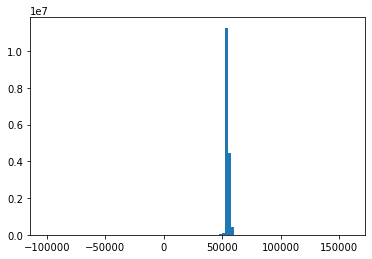

In [58]:
plt.hist(data_ccd.ravel(),bins=100)

In [59]:
print(np.min(data_ccd.ravel()),np.max(data_ccd.ravel()))

-101292.0 158812.0


/tmp/ipykernel_14206/1548494273.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data_ccd,cmap="gray",vmin=48000,vmax=60000,norm=LogNorm())


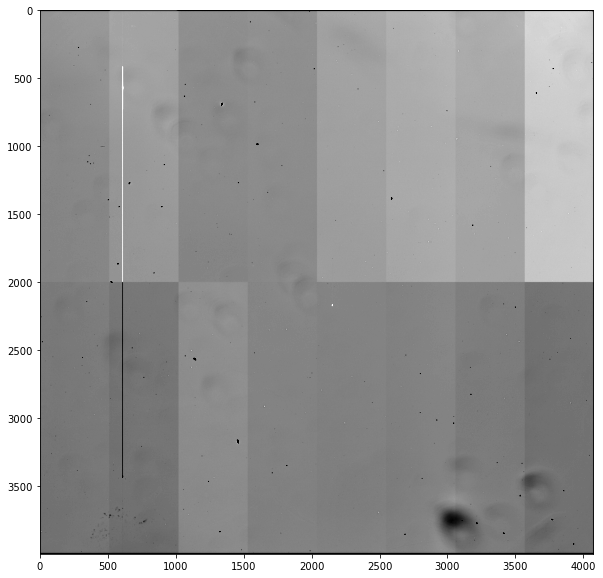

In [60]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(data_ccd,cmap="gray",vmin=48000,vmax=60000,norm=LogNorm())

In [61]:
print('Median before renormalising = ', median_)
data_ccd_ = data_ccd/median_
print(data_ccd[200,402:410])
print('Median after renormalising = ', np.median(data_ccd_.ravel()))
print(data_ccd_[200,402:410])
print(np.min(data_ccd_.ravel()),np.max(data_ccd_.ravel()))

Median before renormalising =  54071.0
[54497. 54727. 54478. 54889. 54589. 54449. 54964. 55102.]
Median after renormalising =  1.0
[1.00787853 1.0121322  1.00752714 1.01512826 1.00958    1.00699081
 1.01651532 1.01906752]
-1.8733147158365853 2.9371012187679164


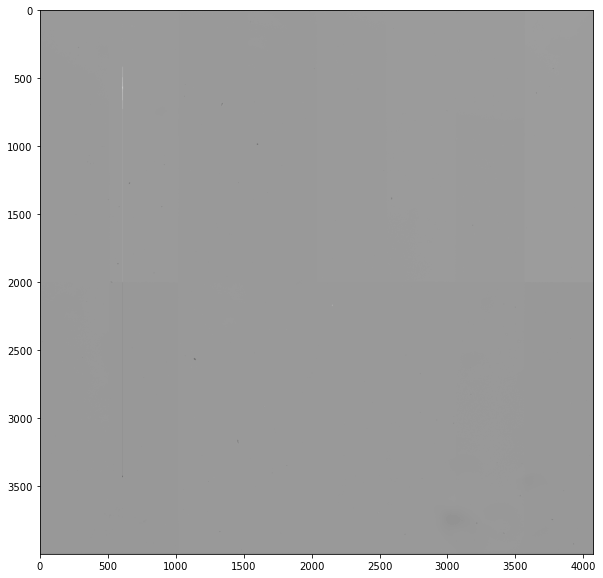

In [62]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(data_ccd_,cmap="gray",vmin=-2.0,vmax=3.0)#,norm=LogNorm())

In [64]:
'''
if calc_master_flat==True:
    for filter in filters:
        print('#######################################'+filter)
        median_dict = {}
        data_array = np.array([])
        data_list = []
        for i in range_dict[filter]:
            print(i)
            image_file = image_name.format(date_dict[filter],date_dict[filter].replace("-",""),str(i).zfill(6))
            f = fits.open(image_file)
            shape0 = f[1].data.shape
            for seg in range(num_segments):
                data_ = f[num_segments-seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
                #data_array = np.concatenate((data_array,data_.ravel()))
                data_list.append(data_)
            data_array = np.array(data_list)
            median_dict[i] = np.median(data_array)  
'''

'\nif calc_master_flat==True:\n    for filter in filters:\n        print(\'#######################################\'+filter)\n        median_dict = {}\n        data_array = np.array([])\n        data_list = []\n        for i in range_dict[filter]:\n            print(i)\n            image_file = image_name.format(date_dict[filter],date_dict[filter].replace("-",""),str(i).zfill(6))\n            f = fits.open(image_file)\n            shape0 = f[1].data.shape\n            for seg in range(num_segments):\n                data_ = f[num_segments-seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]\n                #data_array = np.concatenate((data_array,data_.ravel()))\n                data_list.append(data_)\n            data_array = np.array(data_list)\n            median_dict[i] = np.median(data_array)  \n'

In [65]:
if calc_master_flat==True:
    #median_flats = {}
    for filter in filters:
        print('#######################################'+filter)
        #flat_list = []
        new_hdul = fits.HDUList()
        hdu1 = fits.PrimaryHDU()
        for seg in range(num_segments):
            flat_list = []
            #print(seg)
            hdu2 = fits.ImageHDU()
            for num,i in enumerate(range_dict[filter]):
                #hdu2 = fits.ImageHDU()
                image_file = image_name.format(date_dict[filter],date_dict[filter].replace("-",""),str(i).zfill(6))
                #print(image_file)
                f = fits.open(image_file)
                #f.info()
                assert (f[0].header['IMGTYPE']=='FLAT')
                if num == 0 and seg == 0:
                    hdu1.header = f[0].header
                    hdu1.header['PROCESS'] = 'Flat-Master_bias'
                    hdu1.header['PIXSTAT'] = 'Median'
                    hdu1.header['IMGRANGE'] = (np.min(range_dict[filter]),np.max(range_dict[filter]))
                    hdu1.data = f[0].data
                    new_hdul.append(hdu1)
                #print('-------',f[num_segments-seg].data[200,400],type(f[num_segments-seg].data[200,400]))
                data_i = f[num_segments-seg].data 
                #print('-------',data_i[200,400],type(data_i[200,400]))
                #print('################',data[750,200])
                data_i_bias = np.zeros(data_i.shape)
                data_i_bias[shape0[0]-voverscan:,:] = data_i[shape0[0]-voverscan:,:]
                data_i_bias[:,:hprescan] = data_i[:,:hprescan]
                data_i_bias[:,shape0[1]-hoverscan:] = data_i[:,shape0[1]-hoverscan:]
                data_i_bias[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan] = data_i[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]-master_bias[num_segments-seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
                #print('-------',data_i_bias[200,400],type(data_i_bias[200,400]))
                data_i_norm = np.zeros(data_i_bias.shape)
                data_i_norm[shape0[0]-voverscan:,:] = data_i[shape0[0]-voverscan:,:]
                data_i_norm[:,:hprescan] = data_i[:,:hprescan]
                data_i_norm[:,shape0[1]-hoverscan:] = data_i[:,shape0[1]-hoverscan:]
                data_i_norm[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan] = data_i_bias[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]/median_dict[(filter,i)]
                #print('-------',data_i_norm[200,400], median_dict[(filter,i)],type(data_i_norm[200,400]))
                #print('..................')
                
                #print('Flat median = ',np.median(data_norm.ravel()))
                #assert np.median(data_norm.ravel())==1.0
                #print(data.shape)
                flat_list.append(data_i_norm)
                f.close()
            flat_array = np.array(flat_list)
            print(flat_array.shape)
            median_flat = np.median(flat_array,axis=0)
            print(median_flat.shape)
            hdu2.header = f[num_segments-seg].header
            hdu2.data = median_flat
            #median_flats[filter] = median_flat
            new_hdul.append(hdu2)
            print('----------')
        print(len(new_hdul))
        new_hdul.writeto('master_flat_median_{0}_{1}_{2}_{3}_renormalised.fits'.format(date_dict[filter].replace("-",""),filter,np.min(range_dict[filter]),np.max(range_dict[filter])), overwrite=True)

#######################################BG40
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
(10, 2048, 576)
(2048, 576)
----------
17


# TESTS 

In [25]:
#median_bias = np.median(bias_array,axis=0)
#print(median_bias.shape)

In [26]:
fred = fits.open('master_flat_median_20211007_FELH0600_63_115_renormalised.fits')
fred.info()

Filename: master_flat_median_20211007_FELH0600_63_115_renormalised.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     146   ()      
  1  Segment00     1 ImageHDU        18   (576, 2048)   float64   
  2  Segment01     1 ImageHDU        18   (576, 2048)   float64   
  3  Segment02     1 ImageHDU        18   (576, 2048)   float64   
  4  Segment03     1 ImageHDU        18   (576, 2048)   float64   
  5  Segment04     1 ImageHDU        18   (576, 2048)   float64   
  6  Segment05     1 ImageHDU        18   (576, 2048)   float64   
  7  Segment06     1 ImageHDU        18   (576, 2048)   float64   
  8  Segment07     1 ImageHDU        18   (576, 2048)   float64   
  9  Segment17     1 ImageHDU        18   (576, 2048)   float64   
 10  Segment16     1 ImageHDU        18   (576, 2048)   float64   
 11  Segment15     1 ImageHDU        18   (576, 2048)   float64   
 12  Segment14     1 ImageHDU        18   (576, 2048)   float64   
 13  Segmen

In [29]:
shape0 = fred[1].data.shape
print(shape0)

(2048, 576)


In [30]:
for seg in range(1,9):
    print(seg,fred[seg].header['EXTNAME'])
    data_ = fred[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=1)
    if seg==1:
        dred0 = data_
    else:
        dred0 = np.concatenate((dred0,data_),axis=1)
for seg in range(9,num_segments+1):
    seg = num_segments+9-seg
    print(seg,fred[seg].header['EXTNAME'])
    data_ = fred[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=0)
    data_ = np.flip(data_,axis=1)
    if seg==16:
        dred1 = data_
    else:
        dred1 = np.concatenate((dred1,data_),axis=1)
data0red = np.concatenate((dred0,dred1),axis=0)

1 Segment00
2 Segment01
3 Segment02
4 Segment03
5 Segment04
6 Segment05
7 Segment06
8 Segment07
16 Segment10
15 Segment11
14 Segment12
13 Segment13
12 Segment14
11 Segment15
10 Segment16
9 Segment17


(array([1.141000e+03, 8.100000e+02, 6.270000e+02, 4.860000e+02,
        3.310000e+02, 3.100000e+02, 5.540000e+02, 7.370000e+02,
        8.850000e+02, 7.450000e+02, 5.420000e+02, 5.500000e+02,
        7.170000e+02, 8.150000e+02, 7.510000e+02, 6.370000e+02,
        8.200000e+02, 7.910000e+02, 8.180000e+02, 7.690000e+02,
        1.028000e+03, 1.375000e+03, 1.846000e+03, 2.119000e+03,
        2.455000e+03, 2.582000e+03, 2.816000e+03, 3.028000e+03,
        2.955000e+03, 3.111000e+03, 3.339000e+03, 3.810000e+03,
        4.411000e+03, 4.640000e+03, 5.055000e+03, 6.270000e+03,
        7.997000e+03, 9.524000e+03, 1.089300e+04, 1.285100e+04,
        1.831000e+04, 3.796900e+04, 1.130750e+05, 3.275440e+05,
        6.887310e+05, 9.857650e+05, 1.162892e+06, 1.429045e+06,
        1.700307e+06, 1.708228e+06, 1.451052e+06, 9.862340e+05,
        6.038750e+05, 5.567560e+05, 6.912420e+05, 7.683370e+05,
        7.181460e+05, 5.807760e+05, 3.690300e+05, 1.713780e+05,
        6.254000e+04, 3.372200e+04, 8.34

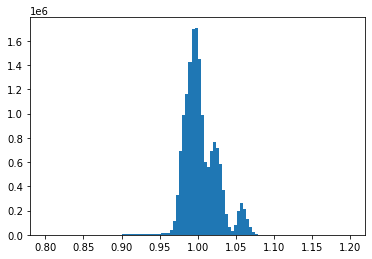

In [31]:
plt.hist(data0red.ravel(),bins=100,range=(0.8,1.2))

In [32]:
data0red[200,400:410]

array([0.97861754, 0.98669105, 0.98681266, 0.98732871, 0.986787  ,
       0.98792329, 0.98640969, 0.98887911, 0.97961182, 0.98252956])

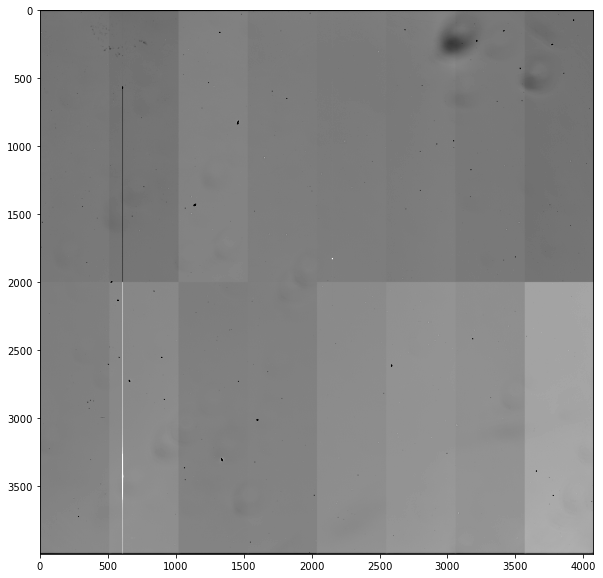

In [33]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(data0red,cmap="gray",vmin=0.8,vmax=1.2)#,norm=LogNorm())fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(data0red,cmap="gray",vmin=0.8,vmax=1.2)#,norm=LogNorm())

In [34]:
np.median(data0red.ravel())

0.9996092384262592

In [35]:
print(np.min(data0red.ravel()),np.max(data0red.ravel()))

-1.8661631587715888 2.9304540830481827


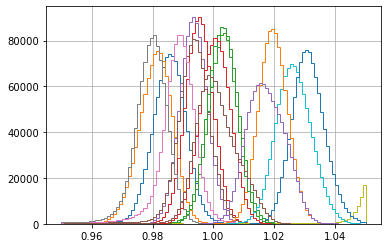

In [38]:
median_vec = []
for seg in range(1,num_segments+1):
    data_ = fred[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    plt.hist(data_.ravel(),bins=100,range=(0.95,1.05),histtype='step')
    median_vec.append(np.median(data_.ravel()))
plt.grid()

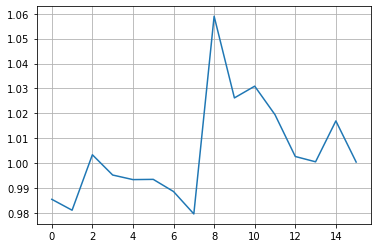

In [39]:
median_vec = np.array(median_vec)
plt.plot(np.arange(num_segments),median_vec)
plt.grid()